In [ ]:
## Imports
import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as T

import numpy as np

### Source - Learn Generative AI with Pytorch by Mark Liu

## Download Data

In [ ]:
transform = torchvision.transforms.Compose([
    T.ToTensor(), # converts to tensor with range (0,1)
    T.Normalize((0.5,),(0.5,)) # converts to tensor with range (-1,1) - Normalize by subtracting 0.5 and then dividing by 0.5
])

In [ ]:
train_set = torchvision.datasets.FashionMNIST(
    root=".",
    train=True,
    download=True,
    transform=transform
)

test_set = torchvision.datasets.FashionMNIST(
    root=".",
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 272kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.97MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.3MB/s]


In [ ]:
train_set[0]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [ ]:
text_labels=['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

## Visualising

In [ ]:
import matplotlib.pyplot as plt

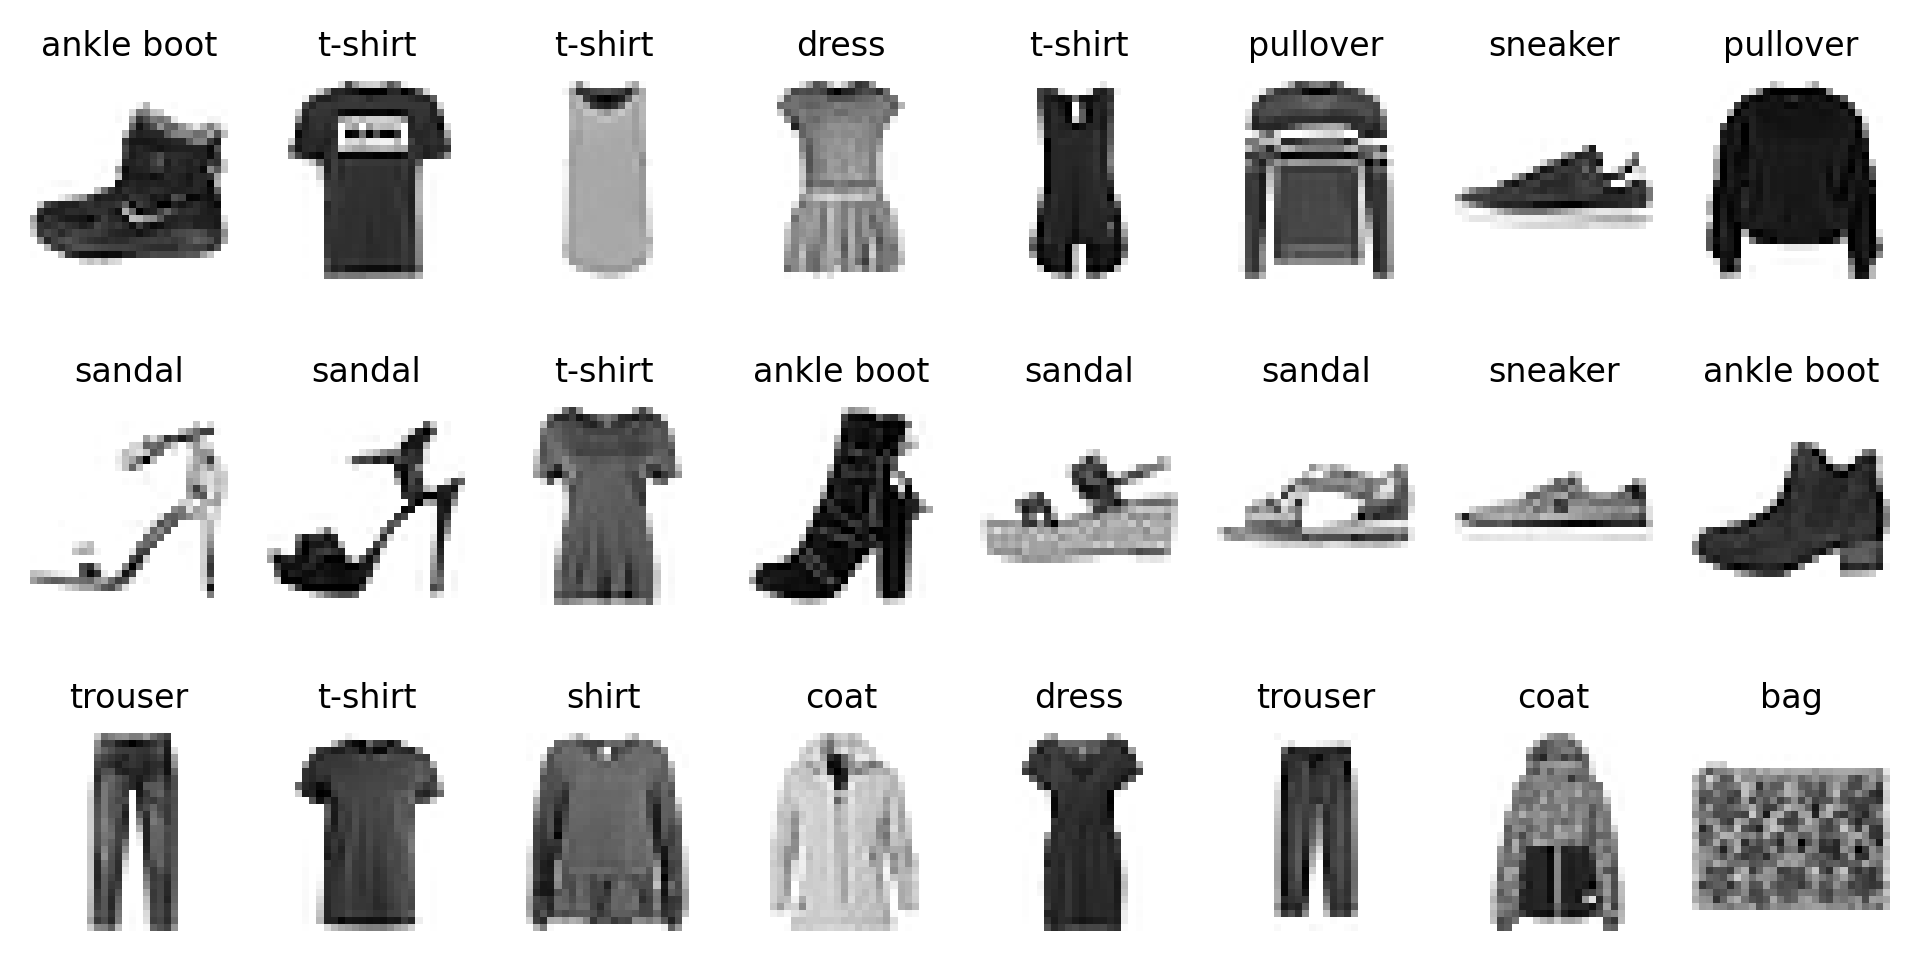

In [ ]:
plt.figure(dpi=300,figsize=(8,4))
for i in range(24):
 ax=plt.subplot(3, 8, i + 1)
 img=train_set[i][0]
 img=img/2+0.5
 img=img.reshape(28, 28)
 plt.imshow(img,
            cmap="binary")
 plt.axis('off')
 plt.title(text_labels[train_set[i][1]],
           fontsize=8)
plt.show()

## Binary Classification
Two classes at with labels
- 0 (t-shirt)
- 9 (ankle boots)

In [ ]:
# x[0]: have image
# x[1]: have label for image
binary_train_set=[x for x in train_set if x[1] in [0,9]]
binary_test_set=[x for x in test_set if x[1] in [0,9]]

### The Data Loader

The `DataLoader` class in the PyTorch `utils` package helps create data iterators in batches.

DataLoader can load data from
- Dataset Classes
- Tensors or Arrays of data
- Directory of data (image directory, etc ...)
- hd5 files
- Pandas DataFrames or Numpy Arrays/Files (.npy)

and more ...

In [ ]:
batch_size = 32

binary_train_loader = torch.utils.data.DataLoader(
    binary_train_set,
    batch_size=batch_size,
    shuffle=True
)

binary_test_loader = torch.utils.data.DataLoader(
    binary_test_set,
    batch_size=batch_size,
    shuffle=True
)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Train

In [ ]:
binary_model = nn.Sequential(
    nn.Linear(28*28,256), # each image is 28 by 28 -> 786 values - Dense Layer
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,32),
    nn.ReLU(),
    nn.Linear(32,1),
    nn.Dropout(p=0.25),
    nn.Sigmoid().to(device)
)

In [ ]:
lr= 0.001
optimizer= torch.optim.Adam(binary_model.parameters(), lr=lr)
loss_fn= nn.BCELoss() # Binary Cross Entropy Loss

In [ ]:
n = len(binary_train_loader)
for i in range(50):
 tloss=0
 for imgs,labels in binary_train_loader:
  imgs=imgs.reshape(-1,28*28)
  imgs=imgs.to(device)
  labels=torch.FloatTensor(
               [x if x==0 else 1 for x in labels])
  labels=labels.reshape(-1,1).to(device) # reshape to a 2 dimension 2D

  preds=binary_model(imgs) # get predictions
  loss=loss_fn(preds,labels)
  optimizer.zero_grad() # make gradients zero
  loss.backward() # compute gradients
  optimizer.step() # optimizer step to optimize

  tloss+=loss.detach() # detach loss from computational graph
  tloss=tloss/n

  print(f"at epoch {i}, loss is {tloss}")


Streaming output truncated to the last 5000 lines.
at epoch 36, loss is 0.00034765430609695613
at epoch 36, loss is 0.0002897384110838175
at epoch 36, loss is 0.00034734621294774115
at epoch 36, loss is 0.00034749985206872225
at epoch 36, loss is 0.0004052625154145062
at epoch 36, loss is 0.000809752382338047
at epoch 36, loss is 0.00046425749314948916
at epoch 36, loss is 0.0003478116123005748
at epoch 36, loss is 0.000520787900313735
at epoch 36, loss is 0.00046348688192665577
at epoch 36, loss is 0.00040557183092460036
at epoch 36, loss is 0.00046317963278852403
at epoch 36, loss is 0.0004055709869135171
at epoch 36, loss is 0.00023213058011606336
at epoch 36, loss is 0.0004627171438187361
at epoch 36, loss is 0.0004633320204447955
at epoch 36, loss is 0.00023228461213875562
at epoch 36, loss is 0.00028943075449205935
at epoch 36, loss is 0.00023182088625617325
at epoch 36, loss is 0.0005204785848036408
at epoch 36, loss is 0.0004057238111272454
at epoch 36, loss is 0.00040541781345

In [ ]:
# =============== Testing ================= #
results=[]
for imgs,labels in binary_test_loader:
  imgs=imgs.reshape(-1,28*28).to(device)
  labels=(labels/9).reshape(-1,1).to(device)
  preds=binary_model(imgs)
  pred10=torch.where(preds>0.5,1,0) # 1 if greater 0.5 else 0
  correct=(pred10==labels)
  results.append(correct.detach().cpu()\
  .numpy().mean())
accuracy=np.array(results).mean()
print(f"the accuracy of the predictions is {accuracy}")

the accuracy of the predictions is 0.8779761904761905


## Multiclass Classification

In [ ]:
model=nn.Sequential(
          nn.Linear(28*28,256),
          nn.ReLU(),
          nn.Linear(256,128),
          nn.ReLU(),
          nn.Linear(128,64),
          nn.ReLU(),
          nn.Linear(64,10)
          ).to(device)

In [ ]:
# Separate a Validation set from train set
train_set,val_set=torch.utils.data.random_split(\
 train_set,[50000,10000])

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=batch_size,
    shuffle=True
)

val_loader=torch.utils.data.DataLoader(
 val_set,
 batch_size=batch_size,
 shuffle=True)

test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=batch_size,
    shuffle=True
)

In [ ]:
# Early Stopping Class
class EarlyStop:
 def __init__(self, patience=10):
  self.patience = patience
  self.steps = 0
  self.min_loss = float('inf')
 def stop(self, val_loss):
  if val_loss < self.min_loss:
    self.min_loss = val_loss
    self.steps = 0
  elif val_loss >= self.min_loss:
    self.steps += 1
  if self.steps >= self.patience:
    return True
  else:
    return False

stopper=EarlyStop()

PyTorch `nn.CrossEntropyLoss()` class as our loss function, which
combines `nn.LogSoftmax()` and `nn.NLLLoss()` in one single class.

In [ ]:
lr= 0.001
optimizer= torch.optim.Adam(binary_model.parameters(), lr=lr)
loss_fn= nn.CrossEntropyLoss() # Cross Entropy Loss

In [ ]:
def train_epoch():
 tloss=0
 for n,(imgs,labels) in enumerate(train_loader):
  imgs=imgs.reshape(-1,28*28).to(device)
  labels=labels.reshape(-1,).to(device)
  preds=model(imgs)
  loss=loss_fn(preds,labels)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  tloss+=loss.detach()
 return tloss/n

In [ ]:
def val_epoch():
 vloss=0
 for n,(imgs,labels) in enumerate(val_loader):
  imgs=imgs.reshape(-1,28*28).to(device)
  labels=labels.reshape(-1,).to(device)
  preds=model(imgs)
  loss=loss_fn(preds,labels)
  vloss+=loss.detach()
 return vloss/n

In [ ]:
for i in range(1,101):
 tloss=train_epoch()
 vloss=val_epoch()
 print(f"at epoch {i}, tloss is {tloss}, vloss is {vloss}")
 if stopper.stop(vloss)==True:
  break

at epoch 1, tloss is 2.3083834648132324, vloss is 2.312181234359741
at epoch 2, tloss is 2.3083863258361816, vloss is 2.3121087551116943
at epoch 3, tloss is 2.308385133743286, vloss is 2.312199831008911
at epoch 4, tloss is 2.3083906173706055, vloss is 2.312129020690918
at epoch 5, tloss is 2.3083789348602295, vloss is 2.3121607303619385
at epoch 6, tloss is 2.308375358581543, vloss is 2.312129020690918
at epoch 7, tloss is 2.308391571044922, vloss is 2.312108278274536
at epoch 8, tloss is 2.3083832263946533, vloss is 2.312163829803467
at epoch 9, tloss is 2.3083927631378174, vloss is 2.3120920658111572
at epoch 10, tloss is 2.308391571044922, vloss is 2.3121249675750732
at epoch 11, tloss is 2.3083837032318115, vloss is 2.312070369720459
at epoch 12, tloss is 2.308382272720337, vloss is 2.3121049404144287
at epoch 13, tloss is 2.3083858489990234, vloss is 2.3121843338012695
at epoch 14, tloss is 2.308384656906128, vloss is 2.3121256828308105
at epoch 15, tloss is 2.308399200439453, v

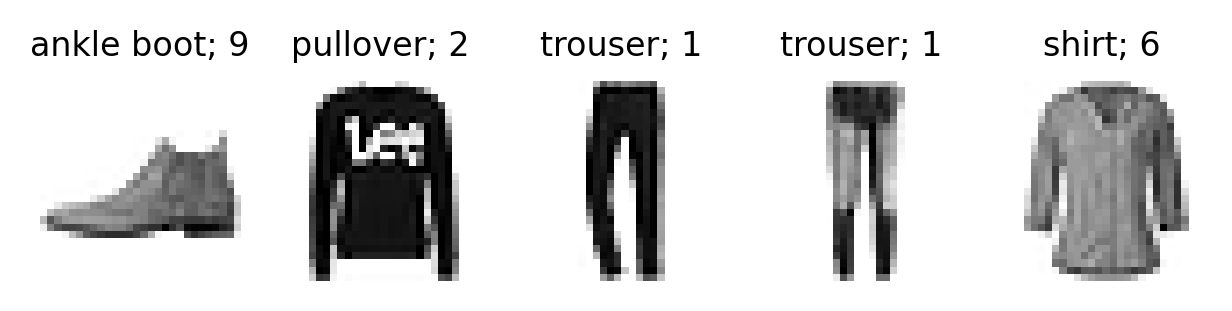

the label is 9; the prediction is 9
the label is 2; the prediction is 9
the label is 1; the prediction is 4
the label is 1; the prediction is 6
the label is 6; the prediction is 9


In [ ]:
plt.figure(dpi=300,figsize=(5,1))
for i in range(5):
 ax=plt.subplot(1,5, i + 1)
 img=test_set[i][0]
 label=test_set[i][1]
 img=img/2+0.5
 img=img.reshape(28, 28)
 plt.imshow(img, cmap="binary")
 plt.axis('off')
 plt.title(text_labels[label]+f"; {label}", fontsize=8)

plt.show()

for i in range(5):
 img,label = test_set[i]
 img=img.reshape(-1,28*28).to(device)
 pred=model(img)
 index_pred=torch.argmax(pred,dim=1)
 idx=index_pred.item()
 print(f"the label is {label}; the prediction is {idx}")

In [ ]:
results=[]
for imgs,labels in test_loader:
 imgs=imgs.reshape(-1,28*28).to(device)
 labels=(labels).reshape(-1,).to(device)
 preds=model(imgs)
 pred10=torch.argmax(preds,dim=1)
 correct=(pred10==labels)
 results.append(correct.detach().cpu().numpy().mean())

accuracy=np.array(results).mean()
print(f"the accuracy of the predictions is {accuracy}")

the accuracy of the predictions is 0.1099241214057508


# Self Practice from memory

Writing code at my own from scratch totally

In [ ]:
transform = torchvision.transforms.Compose([
    T.ToTensor(), # tensor in range 0,1
    T.Normalize((0.5,),(0.5,)) # normalize to range (-1,1), subtract 0.5 then divide by 0.5
])

In [ ]:
# Download the dataset
train_data = torchvision.datasets.FashionMNIST(
    root=".",
    train=True,
    download=True,
    transform=transform
)

test_data = torchvision.datasets.FashionMNIST(
    root=".",
    train=False,
    download=True,
    transform=transform
)


In [ ]:
train_set, val_set = torch.utils.data.random_split(train_data, [50000,10000])

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size= 32,
    shuffle= True
)

val_loader = torch.utils.data.DataLoader(
    val_set,
    batch_size= 32,
    shuffle= True
)

test_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size= 32,
    shuffle= True
)

In [ ]:
# define a simple neural network - Sequential API

model = nn.Sequential(
    nn.Linear(28*28, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
).to(device)

In [ ]:
lr= 0.0001
optim= torch.optim.Adam(model.parameters(), lr=lr)
loss_fn= nn.CrossEntropyLoss()

In [ ]:
# define a training and validation epoch

def train_epoch():
    model.train()  # Put model in training mode
    running_loss = 0
    correct = 0
    total = 0

    for imgs, labels in train_loader:
        imgs = imgs.reshape(-1, 28*28).to(device)
        labels = labels.reshape(-1,).to(device) # reshape to a single dimension 1D

        preds = model(imgs)
        loss = loss_fn(preds, labels)

        optim.zero_grad()
        loss.backward()
        optim.step()

        running_loss += loss.detach()

        preds = torch.tensor([torch.argmax(pred) for pred in preds]) # predshas shape [32, 10] as
                                                                     # 32 is batch size, and
                                                                     # we get 10 class predictions

        # Accuracy calculation
        # predicted = (preds >= 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    avg_loss = running_loss / len(train_loader)
    accuracy = correct / total

    return avg_loss.item(), accuracy


def val_epoch():
    val_loss = 0
    correct = 0
    total = 0

    model.eval()  # Set model to eval mode
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs = imgs.reshape(-1, 28*28).to(device)
            labels = labels.reshape(-1,).to(device)

            preds = model(imgs)
            loss = loss_fn(preds, labels)
            val_loss += loss.detach()

            preds = torch.tensor([torch.argmax(pred) for pred in preds]) # predshas shape [32, 10] as
                                                                     # 32 is batch size, and
                                                                     # we get 10 class predictions

            # Accuracy Calculation
            predicted = (preds >= 0.5).float()  # binary threshold
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_loss = val_loss / len(val_loader)
    accuracy = correct / total

    return avg_loss.item(), accuracy


In [32]:
for i in range(1, 100):
  tloss, tacc= train_epoch()
  vloss, vacc= val_epoch()
  print(f"Epoch {i}: ")
  print(f"Train: loss- {tloss}, accuracy- {tacc}\n")
  print(f"Validation: loss {vloss}, accuracy- {vacc}\n")

Epoch 1: 
Train: loss- 0.6987254619598389, accuracy- 0.17864

Validation: loss 0.5002669095993042, accuracy- 0.1725

Epoch 2: 
Train: loss- 0.45464909076690674, accuracy- 0.18366

Validation: loss 0.431924045085907, accuracy- 0.1715

Epoch 3: 
Train: loss- 0.4098855257034302, accuracy- 0.18442

Validation: loss 0.4052092432975769, accuracy- 0.176

Epoch 4: 
Train: loss- 0.3826929032802582, accuracy- 0.18488

Validation: loss 0.38605791330337524, accuracy- 0.1721

Epoch 5: 
Train: loss- 0.3641038239002228, accuracy- 0.18544

Validation: loss 0.36552488803863525, accuracy- 0.1719

Epoch 6: 
Train: loss- 0.34755322337150574, accuracy- 0.1859

Validation: loss 0.35191524028778076, accuracy- 0.1742

Epoch 7: 
Train: loss- 0.3325176537036896, accuracy- 0.18636

Validation: loss 0.3558535873889923, accuracy- 0.1834

Epoch 8: 
Train: loss- 0.32111191749572754, accuracy- 0.1869

Validation: loss 0.33996325731277466, accuracy- 0.176

Epoch 9: 
Train: loss- 0.30898526310920715, accuracy- 0.18702


In [34]:
# testing the model
# Define a test function

def test_model():
  model.eval()
  correct = 0
  running_loss = 0
  total = 0

  with torch.no_grad():
    for imgs, labels in val_loader:
      imgs = imgs.reshape(-1, 784).to(device) # shape (batch_size,786)
      labels = labels.reshape(-1, ).to(device) # shape(batch_size)

      preds = model(imgs)
      loss = loss_fn(preds, labels)

      running_loss += loss.detach()

      # Calculate Accuracy
      preds = torch.tensor([torch.argmax(pred) for pred in preds]) # get the prediction each is of shape ((1, 10) for now)
      correct += (preds == labels).sum().item()
      total += len(labels)
      accuracy = correct / total

  running_loss = running_loss / len(train_loader)
  accuracy = correct / total

  return running_loss, accuracy

In [35]:
loss, acc = test_model()
print(f"Test Loss is: {loss}")
print(f"Test Accuracy is: {acc}")

Test Loss is: 0.14065183699131012
Test Accuracy is: 0.8895
